In [12]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df= pd.read_csv("C:/Assignment/ABCD Assignment- EDA/ABCD Data.csv", parse_dates= [4, 5])

In [14]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [15]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT


In [16]:
df.keys()

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [17]:
df.apply(lambda x: sum(x.isnull()))
#Thete are nulls in Driver id and Drop timestamp

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [18]:
df.shape

(6745, 6)

In [19]:
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [20]:
categorical_columns= [x for x in df.dtypes.index if df.dtypes[x]== 'object']
categorical_columns = [x for x in categorical_columns if x not in ['Request timestamp','Drop timestamp']]
for col in categorical_columns:
    print ('\nfrequency of categories for variable %s'%col)
    print (df[col].value_counts())
#It is clear from below that the missing values in the Drop timestamp variable are due the either Cancelled trips or there were no cars avaulable during the time of request.


frequency of categories for variable Pickup point
City       3507
Airport    3238
Name: Pickup point, dtype: int64

frequency of categories for variable Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


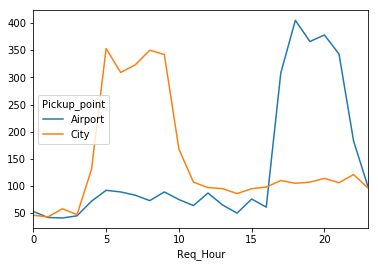

In [24]:
#adding a request hour column extracted from Request timestamp and plotting it with pick up point to see what time of the day are there more pickups from what part of the city
#from the plot it is clear that there is a high demand in the city during 5am to 11am (approx.) and a high demand from aiport during 6pm to 10pm (approx.)
df.columns = df.columns.str.replace(' ', '_')
df['Req_Hour'] = df.Request_timestamp.dt.hour
gp = df.groupby(['Pickup_point','Req_Hour']).size().unstack(0).plot()

In [22]:
#It is clear that the missing values in the Drop timestamp variable are due the either Cancelled trips or there were no cars avaulable during the time of request.
#no cars available is clearly a case of lesser demand and the company is losing out on revenue. let us examine if this in the city or the airport
# also we will examine if most of the cancellations are from city or airport 
# cancellations on the break of time of request might also give some insight


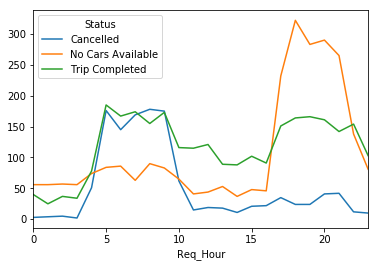

In [25]:
#Most of the cancellations by the drivers in the city are during the high demand times. This indicates that this a clear case of fault with the driver. There is a major revenue loss here.
#Further,during the peak times from airport it is observed that there is a huge demand supply gap. There are a lots of cases of cars not available during peak flow of demand. This is again a loss of revenue opportunity
gp = df.groupby(['Status','Req_Hour']).size().unstack(0).plot()

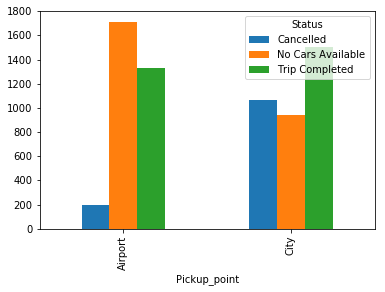

In [26]:
#Most of the cancellations from drivers are happening in the cities comparred to few from airport and there is huge demand supply gap in the airport than in the city.
gp = df.groupby(['Status','Pickup_point']).size().unstack(0).plot(kind = 'bar')

In [30]:
#Creating a variable to identify bad drivers
gp = df.groupby(['Status','Driver_id']).size().unstack(0).fillna(0)

In [31]:
gp['Cancelation_Ratio'] =  gp['Cancelled'] / (gp['Trip Completed'] +  gp['Cancelled'])*100

In [32]:
gp = gp.sort_values(by = 'Cancelation_Ratio', ascending= False)

In [33]:
Bad_drivers = gp[gp.Cancelation_Ratio >=30].index

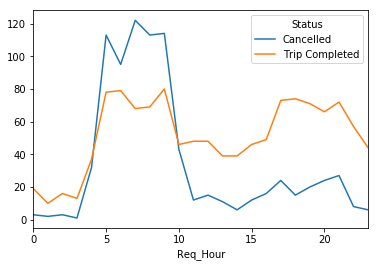

In [34]:
# Rround 200 drivers could be identified as bad drivers that are showing a bad behaviour by cancelling rides during peak demand hours.
df[df.Driver_id.isin(Bad_drivers)].groupby(['Status','Req_Hour']).size().unstack(0).plot()